# Wine Quality
* #### Dataset
The Wine Quality dataset is publicly available at machine learning repositories, such as [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The dataset consists of physical and chemical properties of 6497 wines (1599 red and 4898 white) along with quality scores given to each instance by a panel of wine testers (median of at least 3 evaluations). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). Due to privacy and logistic issues, only physico-chemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

* #### Attributes
Input variables (based on physico-chemical tests):
   1. - fixed acidity
   2. - volatile acidity
   3. - citric acid
   4. - residual sugar
   5. - chlorides
   6. - free sulfur dioxide
   7. - total sulfur dioxide
   8. - density
   9. - pH
   10. - sulphates
   11. - alcohol
   
* #### Objective
The objective of this notebook is to predict the quality score assigned to each wine by a group of experts using chemical properties of each wine as predictor variables. Moreover, we will treat the problem as a regression problem rather than multi-class classification due to the following reasons:
1. Treating the problem as multi-class classification would ignore the ordering / gradation relationship between scores; for example, 6 is a better score than 5 and a worse score than 7.
2. In the multi-class classification setting, misclassifying a wine with quality score 5 as 6 or 9 are equivalent with respect to the error function. However, in a regression setting the latter is penalized more.

## Step 1: Loading libraries to be used in the modeling, loading the dataset, and initial exploratory analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version: ',sns.__version__)

numpy version:  1.18.1
pandas version:  0.25.3
seaborn version:  0.9.0


In [2]:
# white wine is coded as wine type = 1

df_white = pd.read_csv('datasets/winequality-white.csv', sep=';', header='infer')
df_white['wine type'] = 1
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [3]:
df_white.shape

(4898, 13)

In [4]:
# red wine is coded as wine type = 0

df_red = pd.read_csv('datasets/winequality-red.csv', sep=';', header='infer')
df_red['wine type'] = 0
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [5]:
df_red.shape

(1599, 13)

In [6]:
# combining the two dataframes into one

data = pd.concat((df_white, df_red), axis=0, ignore_index=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [7]:
data.shape

(6497, 13)

In [8]:
#separating the predictor variables and the response variable

X = data.drop(['quality'], axis=1)
y = data['quality']

In [9]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [10]:
#checking to see whether we have any missing values among features: No, there are not.

X.columns[X.isnull().any()]

Index([], dtype='object')

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
wine type               6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [12]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [13]:
#checking the response variable

pd.DataFrame(y).groupby('quality').size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

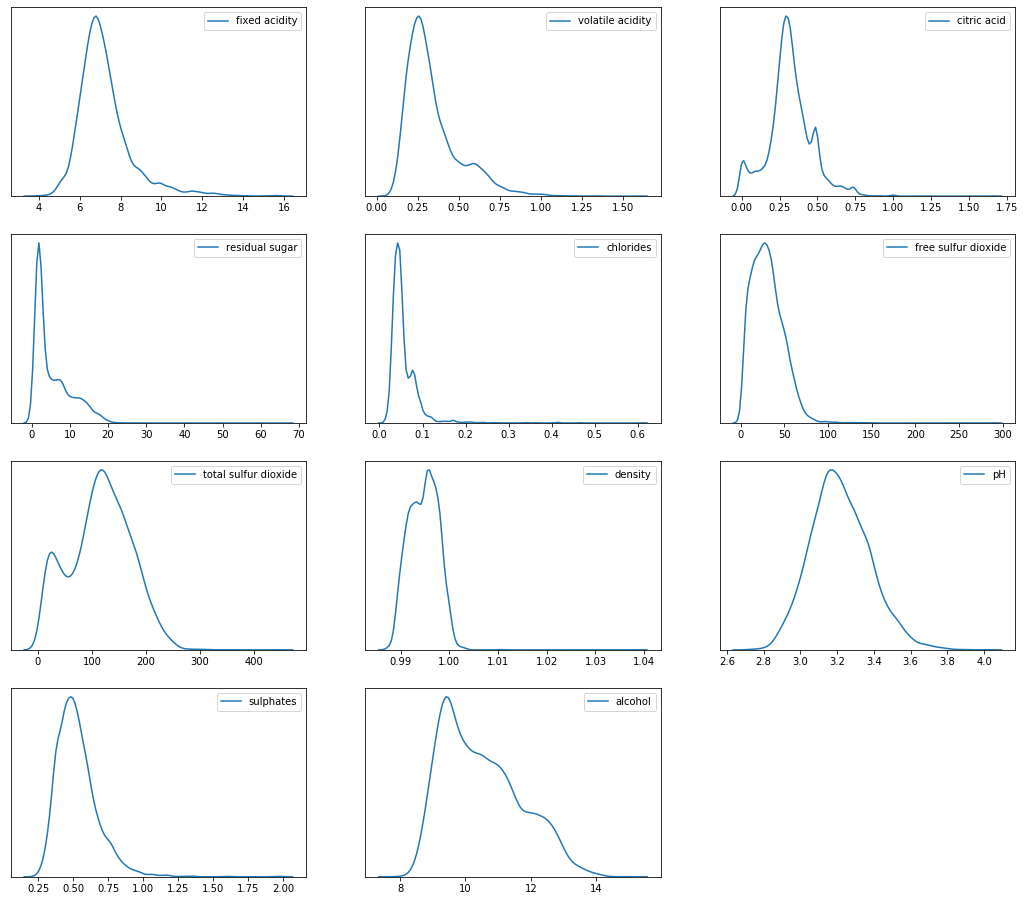

In [14]:
#density plot of predictor variables

plt.figure(figsize=(18,16))

for n in range(0, 11):
    plt.subplot(4, 3, n+1)
    sns.kdeplot(X.iloc[:, n])
    plt.yticks([])

## Step 2: Splitting the data into train and test sets

In [15]:
# setting 25% data aside for the test set
# also assuring that the data is split in a stratified way

random_seed = 2020
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=random_seed)

## Step 3: Trying various algorithms out of box
According to "No Free Lunch Theorem", there is no universal algorithm which outperforms all other methods. Equivalently, if you make no assumptions about the data, then there is no reason to prefer one model over any other. Thus, I will try a good number of models on the dataset and pick top performers for further study.

I will use mean absolute error as the metric to determine which model outperforms the others.

In [16]:
#models that don't need scaling

from sklearn.ensemble import (AdaBoostRegressor, 
                              BaggingRegressor, 
                              ExtraTreesRegressor,
                              GradientBoostingRegressor,
                              RandomForestRegressor)

models_ensemble = [
    ('Ada', AdaBoostRegressor(random_state=random_seed)),
    ('Bag', BaggingRegressor(random_state=random_seed)),
    ('ETR', ExtraTreesRegressor(random_state=random_seed, criterion='mae')),
    ('GBR', GradientBoostingRegressor(random_state=random_seed, criterion='mae')),
    ('RFR', RandomForestRegressor(random_state=random_seed, criterion='mae'))
]

models_need_NO_scaling = models_ensemble

In [17]:
#models that need scaling

from sklearn.neighbors import KNeighborsRegressor
                               
from sklearn.svm import SVR
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  Lars,
                                  LassoLars,
                                  ElasticNet,
                                  ARDRegression,
                                  BayesianRidge,
                                  HuberRegressor,
                                  RANSACRegressor, 
                                  TheilSenRegressor)
models_neighbors = [('KNR', KNeighborsRegressor(weights='distance'))]
models_svm = [('SVR', SVR())]
models_linear = [
    ('Lin', LinearRegression()),
    ('Ridge', Ridge(random_state=random_seed)),
    ('Lasso', Lasso(random_state=random_seed)),
    ('Lars', Lars()),
    ('LassoLars', LassoLars()),
    ('ENet', ElasticNet(random_state=random_seed)),
    ('ARD', ARDRegression()),
    ('BayRid', BayesianRidge()),
    ('Huber', HuberRegressor()),
    ('RANSAC', RANSACRegressor(random_state=random_seed)),
    ('TSR', TheilSenRegressor(random_state=random_seed))
]

models_need_scaling = models_neighbors + models_svm + models_linear

### Trying algorithms that do NOT need scaling on the training set
I am using 5-fold cross validation to evaluate the models on the training set with respect to MAE.

In [18]:
from sklearn.model_selection import cross_val_score

models = models_need_NO_scaling
cv = 5
scoring = 'neg_mean_absolute_error'

cv_results = {}

for name, model in models:
    cv_res = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring, verbose=2, n_jobs=-1)
    cv_results[name] = cv_res

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   58.0s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worker

In [19]:
results_df = -pd.DataFrame(cv_results, index=range(1, cv+1))

In [20]:
results_df.mean(axis='index').sort_values()

ETR    0.411130
RFR    0.466647
Bag    0.472210
GBR    0.520358
Ada    0.572829
dtype: float64

In [21]:
results_df.std(axis='index')

Ada    0.017103
Bag    0.015091
ETR    0.014947
GBR    0.024413
RFR    0.015636
dtype: float64

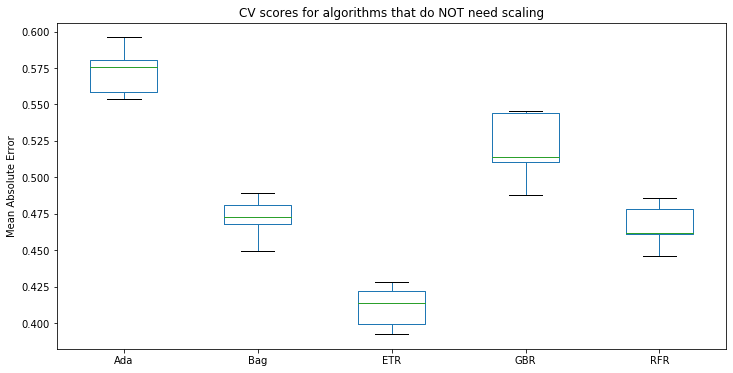

In [22]:
results_df.plot(kind='box', figsize=(12, 6))
plt.title('CV scores for algorithms that do NOT need scaling')
plt.ylabel('Mean Absolute Error')
plt.show()

### Trying algorithms that need scaling on the training set
Again, I am using 5-fold cross validation to evaluate the models on the training set with respect to MAE.

One has to be careful about data leakage! I formed a pipeline of each model with the Standard Scaler so as to prevent underestimation of errors in cross validation.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

models_sc = models_need_scaling
cv = 5
scoring = 'neg_mean_absolute_error'

cv_results_sc = {}


quan_features = list(range(0, 11))
preprocessor = ColumnTransformer(transformers=
                                [('scaler', StandardScaler(), quan_features)], remainder='passthrough')

for name, model in models_sc:
    model_pip = Pipeline([
        ('prep', preprocessor),
        (name, model)
    ])
    cv_res = cross_val_score(model_pip, X_train, y_train, cv=cv, scoring=scoring, verbose=2, n_jobs=-1)
    cv_results_sc[name] = cv_res

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worker

In [24]:
results_df_sc = -pd.DataFrame(cv_results_sc, index=range(1, cv+1))

In [25]:
results_df_sc.mean(axis='index').sort_values()

KNR          0.439553
SVR          0.512834
Huber        0.569606
BayRid       0.570477
Ridge        0.570507
Lin          0.570515
Lars         0.570515
ARD          0.571035
TSR          0.573860
RANSAC       0.676217
Lasso        0.685509
LassoLars    0.685509
ENet         0.685509
dtype: float64

In [26]:
results_df_sc.std(axis='index')

KNR          0.015834
SVR          0.018150
Lin          0.017588
Ridge        0.017582
Lasso        0.023723
Lars         0.017588
LassoLars    0.023723
ENet         0.023723
ARD          0.017180
BayRid       0.017537
Huber        0.017536
RANSAC       0.057282
TSR          0.020268
dtype: float64

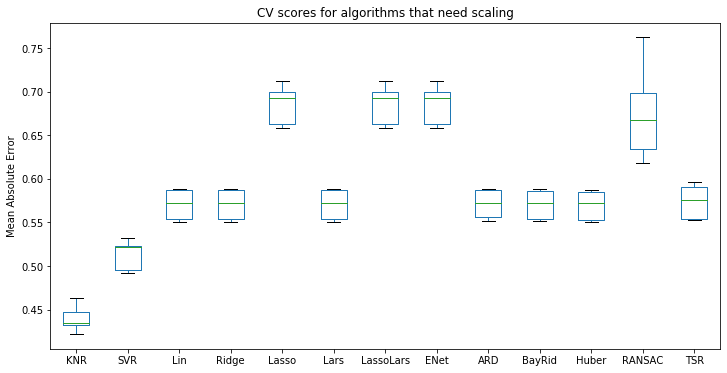

In [27]:
results_df_sc.plot(kind='box', figsize=(12, 6))
plt.title('CV scores for algorithms that need scaling')
plt.ylabel('Mean Absolute Error')
plt.show()

### Comparison of all out-of-box algorithms

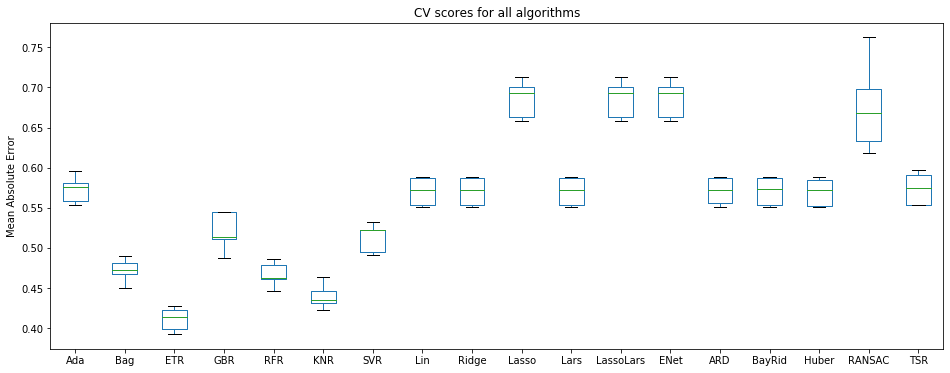

In [28]:
results = pd.concat([results_df, results_df_sc], axis='columns')

results.plot(kind='box', figsize=(16, 6))
plt.title('CV scores for all algorithms')
plt.ylabel('Mean Absolute Error')
plt.show()

#### Results:
The following algorithms deserve further study:

* RFR -- Random Forest Regressor
* ETR -- Extra Trees Regressor
* KNR -- K-Neighbors Regressor

## Step 4: Fine Tuning of Promising Algorithms
I will fine-tune (find optimal hyperparameters) for the promising algorithms using 5-fold cross validation with respect to MAE.

In [29]:
from sklearn.model_selection import GridSearchCV

### KNR -- K-Neighbors Regressor

In [30]:
neighbors = list(range(1, 10))  #default=5, bias decreases as it decreases
p = [1, 2]

par_grid_KNR = dict(KNR__n_neighbors=neighbors, KNR__p=p)

model = Pipeline([
    ('prep', preprocessor),
    ('KNR', KNeighborsRegressor(weights='distance'))
])

grid_KNR = GridSearchCV(estimator=model, param_grid=par_grid_KNR, cv=cv, 
                        verbose=2, n_jobs=-1, scoring=scoring)
grid_result_KNR = grid_KNR.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


In [31]:
grid_result_KNR.best_params_

{'KNR__n_neighbors': 8, 'KNR__p': 1}

In [32]:
-grid_result_KNR.best_score_

0.43108627315159664

In [33]:
rKNR = pd.DataFrame(grid_result_KNR.cv_results_)[['params', 'mean_test_score', 
                                           'std_test_score', 'rank_test_score']].sort_values('rank_test_score')
rKNR['mean_test_score'] = -rKNR['mean_test_score']
rKNR.head(5)

,params,mean_test_score,std_test_score,rank_test_score
14,"{'KNR__n_neighbors': 8, 'KNR__p': 1}",0.431086,0.013019,1
12,"{'KNR__n_neighbors': 7, 'KNR__p': 1}",0.431864,0.012357,2
16,"{'KNR__n_neighbors': 9, 'KNR__p': 1}",0.432128,0.013411,3
10,"{'KNR__n_neighbors': 6, 'KNR__p': 1}",0.433664,0.012797,4
15,"{'KNR__n_neighbors': 8, 'KNR__p': 2}",0.434454,0.014477,5


#### The best estimator is with n_neighbors=8 and p=1

### RFR -- Random Forest Regressor

In [34]:
criterion = ['mse', 'mae']
n_estimators = [100, 125, 150, 200]   #default=100, bias increases as it decreases

par_grid_RFR = dict(criterion=criterion, n_estimators=n_estimators)

model = RandomForestRegressor(random_state=random_seed)

grid_RFR = GridSearchCV(estimator=model, param_grid=par_grid_RFR, cv=cv, 
                        verbose=2, n_jobs=-1, scoring=scoring)
grid_result_RFR = grid_RFR.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 11.6min finished


In [35]:
grid_result_RFR.best_params_

{'criterion': 'mse', 'n_estimators': 200}

In [36]:
-grid_result_RFR.best_score_

0.4488636855683673

In [37]:
rRFR = pd.DataFrame(grid_result_RFR.cv_results_)[['params', 'mean_test_score', 
                                           'std_test_score', 'rank_test_score']].sort_values('rank_test_score')
rRFR['mean_test_score'] = -rRFR['mean_test_score']
rRFR.head(5)

,params,mean_test_score,std_test_score,rank_test_score
3,"{'criterion': 'mse', 'n_estimators': 200}",0.448864,0.013768,1
2,"{'criterion': 'mse', 'n_estimators': 150}",0.449494,0.014225,2
0,"{'criterion': 'mse', 'n_estimators': 100}",0.449870,0.013939,3
1,"{'criterion': 'mse', 'n_estimators': 125}",0.449911,0.014225,4
7,"{'criterion': 'mae', 'n_estimators': 200}",0.466052,0.012695,5


#### The best estimator is with n_estimators=200 and criterion='mse'

### ETR -- Extra Trees Regressor

In [38]:
criterion = ['mse', 'mae']
n_estimators = [100, 125, 150, 200]   #default=100, bias increases as it decreases

par_grid_ETR = dict(criterion=criterion, n_estimators=n_estimators)

model = ExtraTreesRegressor(random_state=random_seed)

grid_ETR = GridSearchCV(estimator=model, param_grid=par_grid_ETR, cv=cv, 
                        verbose=2, n_jobs=-1, scoring=scoring)
grid_result_ETR = grid_ETR.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.1min finished


In [39]:
grid_result_ETR.best_params_

{'criterion': 'mse', 'n_estimators': 200}

In [40]:
-grid_result_ETR.best_score_

0.40870198494182064

In [41]:
rETR = pd.DataFrame(grid_result_ETR.cv_results_)[['params', 'mean_test_score', 
                                           'std_test_score', 'rank_test_score']].sort_values('rank_test_score')
rETR['mean_test_score'] = -rETR['mean_test_score']
rETR.head(5)

,params,mean_test_score,std_test_score,rank_test_score
3,"{'criterion': 'mse', 'n_estimators': 200}",0.408702,0.014088,1
7,"{'criterion': 'mae', 'n_estimators': 200}",0.408723,0.013614,2
6,"{'criterion': 'mae', 'n_estimators': 150}",0.409152,0.013220,3
2,"{'criterion': 'mse', 'n_estimators': 150}",0.409154,0.013584,4
1,"{'criterion': 'mse', 'n_estimators': 125}",0.409190,0.013613,5


#### The best estimator is with n_estimators=200 and criterion='mse'

## Step 5: Evaluation of the Tuned Models on the Test Set

In [42]:
from sklearn.metrics import mean_absolute_error

### K-Neighbors Regressor with n_neigbors=8 and p=1

In [43]:
prep = preprocessor.fit(X_train)
X_train_p = prep.transform(X_train)
X_test_p = prep.transform(X_test)

KNR = KNeighborsRegressor(n_neighbors=8, p=1, weights='distance')
KNR.fit(X_train_p, y_train)
preds = KNR.predict(X_test_p)
print('KNR mean absolute error: ', mean_absolute_error(y_test, preds))

KNR mean absolute error:  0.4105045068698604


### Random Forest Regressor with n_estimators=200 and criterion='mse'

In [44]:
RFR = RandomForestRegressor(n_estimators=200, criterion='mse', random_state=random_seed)
RFR.fit(X_train, y_train)
preds = RFR.predict(X_test)
print('RFR mean absolute error: ', mean_absolute_error(y_test, preds))

RFR mean absolute error:  0.4431938461538461


### Extra Trees Regressor with n_estimators=200 and criterion='mse'

In [45]:
ETR = ExtraTreesRegressor(n_estimators=200, criterion='mse', random_state=random_seed)
ETR.fit(X_train, y_train)
preds = ETR.predict(X_test)
print('ETR mean absolute error: ', mean_absolute_error(y_test, preds))

ETR mean absolute error:  0.39278153846153846


### Conclusion:
The best estimator on the test set is Extra Trees Regressor with n_estimators=200 and criterion='mse' with MAE=0.3928